# Session demo
This notebook was written and generated during the live-demo session. Thanks everyone for the engaging discussion!

In [1]:
from bia_bob import bob

In [2]:
%bob Load blobs.tif and show it

StackViewNDArray([[ 40,  32,  24, ..., 216, 200, 200],
                  [ 56,  40,  24, ..., 232, 216, 216],
                  [ 64,  48,  24, ..., 240, 232, 232],
                  ...,
                  [ 72,  80,  80, ...,  48,  48,  48],
                  [ 80,  80,  80, ...,  48,  48,  48],
                  [ 96,  88,  80, ...,  48,  48,  48]], dtype=uint8)
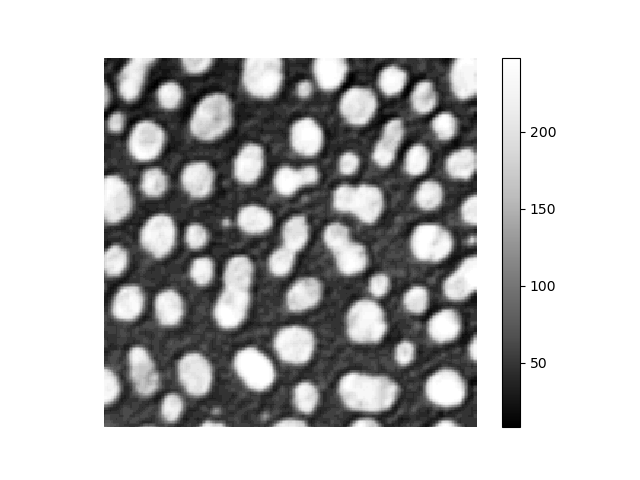
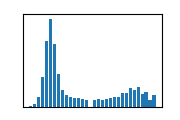

In [3]:
import stackview
from skimage.io import imread

# Load the image
filename = "blobs.tif"
image = imread(filename)

# Display the image
stackview.insight(image)

In [4]:
%%bob
Binarize the image and label individual objects

StackViewNDArray([[ 0,  0,  0, ..., 61, 61, 61],
                  [ 0,  0,  0, ..., 61, 61, 61],
                  [ 0,  0,  0, ..., 61, 61, 61],
                  ...,
                  [ 0,  0,  0, ...,  0,  0,  0],
                  [ 0,  0,  0, ...,  0,  0,  0],
                  [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint32)
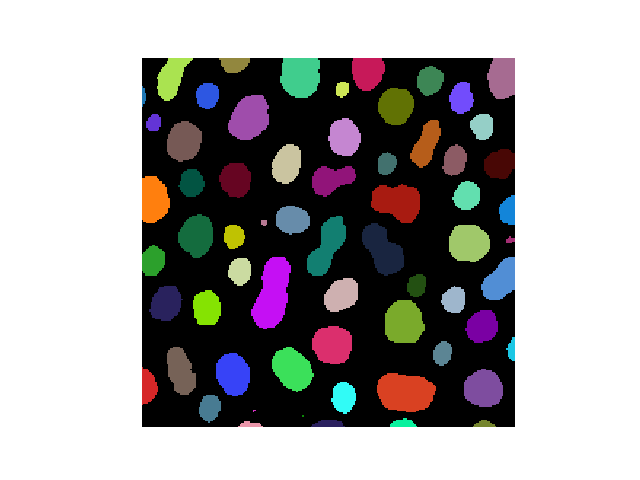

In [5]:
import pyclesperanto_prototype as cle

# Binarize the image using Otsu's method
binary_image = cle.threshold_otsu(image)

# Label individual objects in the binary image
labeled_image = cle.connected_components_labeling_box(binary_image)

# Display the labeled image
stackview.insight(labeled_image)

In [6]:
%%bob
Please remove the object which touch the image border

StackViewNDArray([[0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
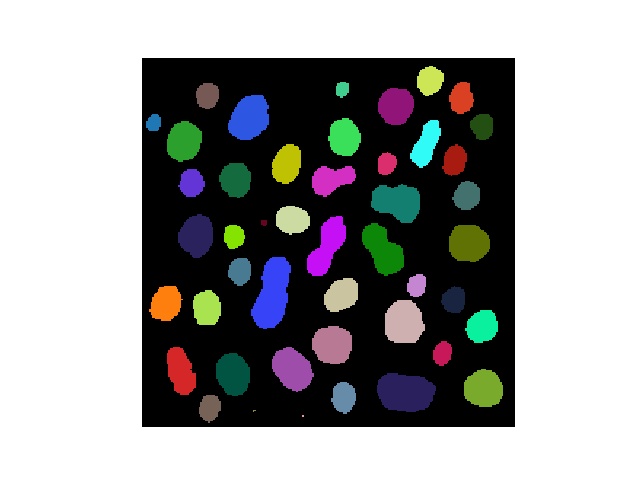

In [7]:
# Import necessary modules
import pyclesperanto_prototype as cle

# Remove objects that touch the image border
cleaned_labeled_image = cle.exclude_labels_on_edges(labeled_image)

# Display the cleaned labeled image
stackview.insight(cleaned_labeled_image)

In [8]:
%%bob
Please measure the area of the objects and the intensity in the original image, and Feret's Diameter

In [11]:
%%bob
I was executing some python code and there was an error. This is my code:

import pandas as pd
from skimage.measure import regionprops_table

# Measure properties of the objects
properties = ['label', 'area', 'mean_intensity', 'feret_diameter_max']
measurements = regionprops_table(cleaned_labeled_image, intensity_image=image, properties=properties)

# Convert measurements to a DataFrame
df = pd.DataFrame(measurements)

# Display the first few rows of the DataFrame
df.head()


And this is the error:

---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
Cell In[9], line 6
      4 # Measure properties of the objects
      5 properties = ['label', 'area', 'mean_intensity', 'feret_diameter_max']
----> 6 measurements = regionprops_table(cleaned_labeled_image, intensity_image=image, properties=properties)
      8 # Convert measurements to a DataFrame
      9 df = pd.DataFrame(measurements)

File ~\miniforge3\envs\bob-env\Lib\site-packages\skimage\measure\_regionprops.py:1097, in regionprops_table(label_image, intensity_image, properties, cache, separator, extra_properties, spacing)
   1094     out_d = _props_to_dict(regions, properties=properties, separator=separator)
   1095     return {k: v[:0] for k, v in out_d.items()}
-> 1097 return _props_to_dict(regions, properties=properties, separator=separator)

File ~\miniforge3\envs\bob-env\Lib\site-packages\skimage\measure\_regionprops.py:882, in _props_to_dict(regions, properties, separator)
    880 # determine the current property name for any deprecated property.
    881 prop = PROPS.get(prop, prop)
--> 882 rp = getattr(r, prop)
    883 if prop in COL_DTYPES:
    884     dtype = COL_DTYPES[prop]

File ~\miniforge3\envs\bob-env\Lib\site-packages\skimage\measure\_regionprops.py:571, in RegionProperties.intensity_mean(self)
    569 @property
    570 def intensity_mean(self):
--> 571     return np.mean(self.image_intensity[self.image], axis=0)

File ~\miniforge3\envs\bob-env\Lib\site-packages\skimage\measure\_regionprops.py:242, in _cached.<locals>.wrapper(obj)
    239     return f(obj)
    241 if prop not in cache:
--> 242     cache[prop] = f(obj)
    244 return cache[prop]

File ~\miniforge3\envs\bob-env\Lib\site-packages\skimage\measure\_regionprops.py:547, in RegionProperties.image_intensity(self)
    541     raise AttributeError('No intensity image specified.')
    542 image = (
    543     self.image
    544     if not self._multichannel
    545     else np.expand_dims(self.image, self._ndim)
    546 )
--> 547 return self._intensity_image[self.slice] * image

TypeError: operand type(s) all returned NotImplemented from __array_ufunc__(<ufunc 'multiply'>, '__call__', array([[ 40,  56,  88, 120, 128, 136, 144, 144, 120,  96],
       [ 56,  80, 120, 160, 168, 168, 168, 168, 144, 120],
       [ 80, 112, 144, 176, 176, 176, 176, 168, 152, 128],
       [ 96, 136, 160, 184, 184, 176, 176, 168, 152, 136],
       [112, 152, 168, 184, 184, 176, 176, 168, 152, 136],
       [128, 160, 176, 184, 184, 176, 176, 168, 152, 136],
       [136, 168, 176, 192, 192, 184, 184, 176, 160, 136],
       [136, 168, 184, 192, 192, 192, 192, 184, 160, 136],
       [128, 168, 184, 200, 200, 200, 192, 184, 160, 128],
       [128, 160, 184, 200, 200, 200, 192, 184, 152, 120],
       [112, 136, 160, 176, 176, 176, 168, 160, 136, 104],
       [ 96, 112, 128, 144, 152, 152, 144, 136, 112,  88]], dtype=uint8), cl.OCLArray([[0, 0, 0, 0, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 0, 0]], dtype=uint8)): 'ndarray', 'OCLArray'

What can I do to fix the error?

In [12]:
import numpy as np
import pyclesperanto_prototype as cle

# Convert the images to NumPy arrays if they are OCLArray
cleaned_labeled_image_np = np.array(cleaned_labeled_image)
image_np = np.array(image)

# Measure properties of the objects
properties = ['label', 'area', 'mean_intensity', 'feret_diameter_max']
measurements = regionprops_table(cleaned_labeled_image_np, intensity_image=image_np, properties=properties)

# Convert measurements to a DataFrame
df = pd.DataFrame(measurements)

# Display the first few rows of the DataFrame
df.head()

,label,area,mean_intensity,feret_diameter_max
0,1,99.0,165.252525,13.000000
1,2,415.0,199.633735,26.925824
2,3,520.0,193.984615,29.120440
3,4,472.0,167.169492,34.785054
4,5,260.0,179.384615,20.248457


In [13]:
%%bob
Please draw a scatter plot of mean_intensity versus feret_diameter_max.

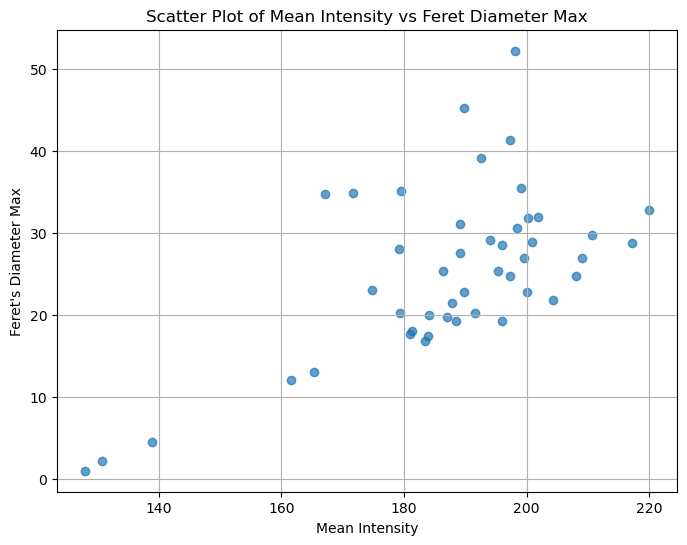

In [14]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['mean_intensity'], df['feret_diameter_max'], alpha=0.7)
plt.title('Scatter Plot of Mean Intensity vs Feret Diameter Max')
plt.xlabel('Mean Intensity')
plt.ylabel("Feret's Diameter Max")
plt.grid(True)
plt.show()

In [15]:
%%bob
Please measure the average distance between objects

In [17]:
%%bob
Modify the following code so that not the distance of any object to all objects is measured, 
but only to the 5 nearest neighbors.

from scipy.spatial import distance_matrix

# Calculate centroids of the labeled objects
properties = ['centroid']
measurements = regionprops_table(cleaned_labeled_image_np, properties=properties)
centroids = np.array(list(zip(measurements['centroid-0'], measurements['centroid-1'])))

# Compute pairwise distances between centroids
dist_matrix = distance_matrix(centroids, centroids)

# Ignore zero-distance (self-distance) by setting diagonal to np.nan
np.fill_diagonal(dist_matrix, np.nan)

# Calculate the average distance
average_distance = np.nanmean(dist_matrix)
average_distance

In [18]:
from scipy.spatial import distance_matrix
import numpy as np

# Calculate centroids of the labeled objects
properties = ['centroid']
measurements = regionprops_table(cleaned_labeled_image_np, properties=properties)
centroids = np.array(list(zip(measurements['centroid-0'], measurements['centroid-1'])))

# Compute pairwise distances between centroids
dist_matrix = distance_matrix(centroids, centroids)

# Ignore zero-distance (self-distance) by setting diagonal to np.nan
np.fill_diagonal(dist_matrix, np.nan)

# Find the distances to the 5 nearest neighbors for each centroid
nearest_distances = np.partition(dist_matrix, 5, axis=1)[:, :5]

# Calculate the average distance to the 5 nearest neighbors
average_distance = np.nanmean(nearest_distances)
average_distance

39.73324999916487

In [19]:
%%bob
Please explain what np.partition is doing

There was an issue. Retrying (1/3)...
There was an issue. Retrying (2/3)...
There was an issue. Retrying (3/3)...


The `np.partition` function is used to partially sort an array such that only the smallest k elements are ordered, while the rest of the elements remain in an unspecified order.

### Detailed Explanation
1. **Function Purpose**: `np.partition` rearranges the elements of an array along a specified axis in such a way that the smallest `k` elements come first, followed by the remaining elements in arbitrary order.

2. **Parameters**:
   - **Array**: The input array you want to partition.
   - **k-th Position**: The position up to which the array should be ordered.
   - **Axis**: Specifies the axis along which to partition the array.

3. **Result**:
   - The elements from index `0` to `k-1` are the smallest `k` elements of the array.
   - The order of elements in the remaining part of the array is undefined.
   - Within the first `k` elements, the ordering is also arbitrary, meaning they are only guaranteed to be the smallest but not necessarily sorted.

4. **Use Case in the Code**:
   - The line `np.partition(dist_matrix, 5, axis=1)[:, :5]` extracts the 5 smallest (nearest) non-zero distances for each row (i.e., each object's centroid) in the `dist_matrix`.
   - This allows us to efficiently retrieve distances of the 5 nearest neighbors without sorting the entire row.

### Example
```
import numpy as np

array = np.array([9, 1, 8, 3, 5, 7, 2])
k = 3

# Partially sort the array
partitioned_array = np.partition(array, k)

print(partitioned_array)
```
In this example, the result might look something like `[2, 1, 3, 8, 5, 7, 9]`, indicating the three smallest elements are at the beginning. The specific order of those first three elements and the remainder of the array is not guaranteed.

In [20]:
np.partition?

Signature:       np.partition(a, kth, axis=-1, kind='introselect', order=None)
Call signature:  np.partition(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function partition at 0x000002B57C2A4220>
File:            c:\users\rober\miniforge3\envs\bob-env\lib\site-packages\numpy\core\fromnumeric.py
Docstring:      
Return a partitioned copy of an array.

Creates a copy of the array with its elements rearranged in such a
way that the value of the element in k-th position is in the position
the value would be in a sorted array.  In the partitioned array, all
elements before the k-th element are less than or equal to that
element, and all the elements after the k-th element are greater than
or equal to that element.  The ordering of the elements in the two
partitions is undefined.

.. versionadded:: 1.8.0

Parameters
----------
a : array_like
    Array to be sorted.
kth : int or sequence of ints
    Element index to partition by. The k-th value of the element
 

In [22]:
%%bob
Can you please summarize the code above into a single python function. 
It should contain only the first steps: Loading, segmentation and measurements of the label, area, mean_intensity, feret_diameter_max. 
The function take the image filename as parameter and returns the dataframe as result.

In [ ]:
from skimage.filters import threshold_otsu
from skimage.morphology import label
import pyclesperanto_prototype as cle

def analyze_image(filename):
    # Load the image
    image = imread(filename)
    
    # Apply Otsu's threshold to binarize the image
    threshold = threshold_otsu(image)
    binary_image = image > threshold
    
    # Perform connected components labeling
    labeled_image = label(binary_image)
    
    # Measure properties of labeled objects
    properties = ['label', 'area', 'mean_intensity', 'feret_diameter_max']
    measurements = regionprops_table(labeled_image, intensity_image=image, properties=properties)
    
    # Convert measurements to a DataFrame
    df = pd.DataFrame(measurements)
    
    # Return the DataFrame
    return df

# Usage
# df_results = analyze_image("path_to_your_image_file.tif")
# df_results.head()